<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [1]:
# importing libraries  
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

In [2]:
# Reading the csv file
df=pd.read_csv('Mall_Customers.csv')

In [3]:
# show the first 5 rows of the dataset
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# drop customer id column
df.drop(columns=['CustomerID'],inplace=True)

In [5]:
# show some statistics about dataset
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# show some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


From information above we see that there is no null values in dataset

In [7]:
# drop duplicates
df.drop_duplicates()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


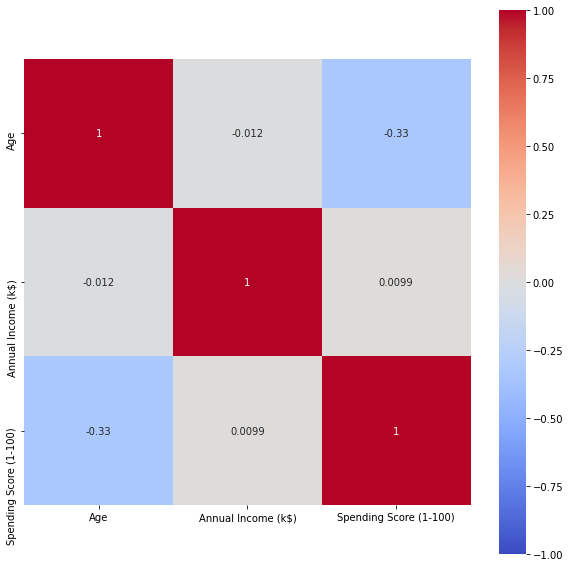

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

<AxesSubplot:>

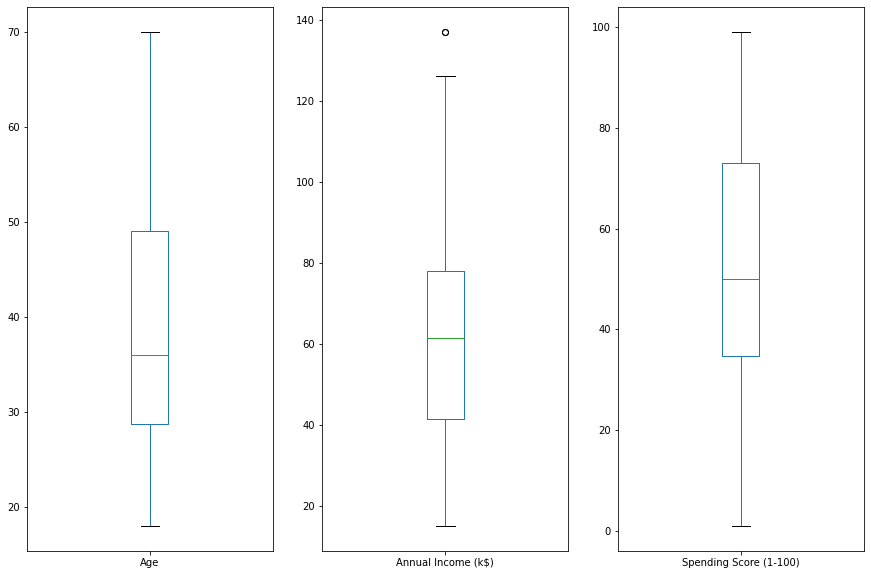

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3)
df['Age'].plot(ax=axes[0],kind='box',figsize=(15,10))
df['Annual Income (k$)'].plot(ax=axes[1],kind='box',figsize=(15,10))
df['Spending Score (1-100)'].plot(ax=axes[2],kind='box',figsize=(15,10))


So there are only  **outlier** in the annual income column

In [10]:
# Drop the outlier
Q1=df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
print("Old Shape: ", df.shape) 
not_outliers = df['Annual Income (k$)'].between((Q1-1.5*IQR),(Q3+1.5*IQR))
df = df[not_outliers]
print("New Shape: ", df.shape) 

Old Shape:  (200, 4)
New Shape:  (198, 4)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

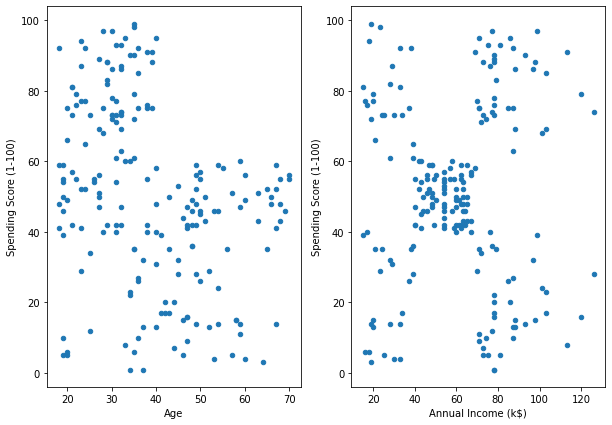

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df.plot.scatter(ax=axes[0],x='Age',y='Spending Score (1-100)',figsize=(10,7))
df.plot.scatter(ax=axes[1],x='Annual Income (k$)',y='Spending Score (1-100)',figsize=(10,7))

<AxesSubplot:ylabel='Spending Score (1-100)'>

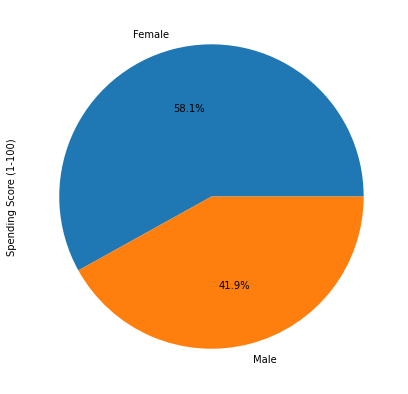

In [12]:
# show spending score based on genre
df.groupby('Genre')['Spending Score (1-100)'].sum().plot.pie(figsize=(7,7),autopct="%.1f%%")

we can see that the spending score is high for female genre

## Implementation of multivariate linear regression

In [13]:
# Normalize the features
x = df[['Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']
x_norm = (x - x.mean()) / x.std() # pandas automatically take the mean and std for every feature in the dataframe

In [14]:
# Create x, y and theta
x_norm=np.array(x_norm)
x_norm=np.c_[np.ones(len(x_norm)),x_norm]
y=np.array(y).reshape(len(y),1)
thetas=np.zeros(x_norm.shape[1]).reshape(x_norm.shape[1],1)

In [15]:
print(x_norm.shape)
print(y.shape)
print(thetas.shape)

(198, 3)
(198, 1)
(3, 1)


In [16]:
def lossFunction(y_predict,y):
    m=len(y)
    return (1/(2*m))*sum((y_predict-y)**2)

def batchGD(x,y,b,alpha,max_iters):
    m=len(y)
    cost_list=[]
    gradients=[0]*len(b)
    for _ in range(max_iters):
        y_predict=np.dot(x,b)
        cost=lossFunction(y_predict,y)
        cost_list.append(cost)
        for i in range(len(b)):
            gradients[i]=(1/m)*sum((y_predict-y)*x[:,i].reshape(len(x),1))
            b[i]=b[i]-alpha*gradients[i]
    return b,cost_list

In [17]:
class MyLinearRegression:
    
    def __init__(self):
        self.theta=[]
        self.cost=[]
        
    def train(self,x,y,b,alpha,max_iters):
        self.theta,self.cost=batchGD(x,y,b,alpha,max_iters)
    
    def test(self,x):
        return x.dot(self.theta)

In [18]:
# Train
model = MyLinearRegression()
model.train(x_norm, y, thetas, 0.01, 500)
print('The coefficient: ',model.theta)

The coefficient:  [[49.86715136]
 [-8.42561274]
 [ 0.29362738]]


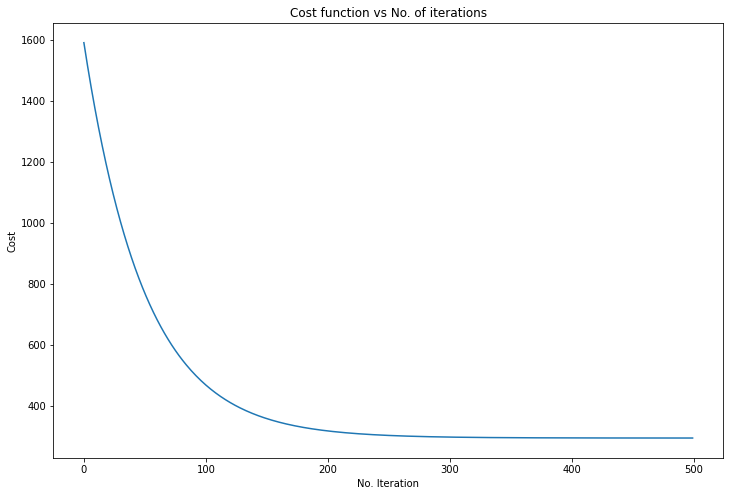

In [19]:
plt.figure(figsize=(12,8))
plt.plot(range(len(model.cost)), model.cost)
plt.xlabel("No. Iteration")
plt.ylabel("Cost")
plt.title("Cost function vs No. of iterations")
plt.show()

In [20]:
# test
y_predicted=model.test(x_norm) # normalized predicted y
print(y_predicted)

[[61.32567503]
 [60.12346317]
 [60.73620378]
 [58.93288598]
 [54.13567319]
 [59.54562659]
 [51.74288414]
 [58.95615534]
 [34.32244675]
 [54.76004848]
 [32.51912895]
 [51.75451882]
 [37.94071703]
 [58.37831876]
 [50.56394163]
 [59.58053062]
 [51.77778817]
 [60.79437717]
 [41.58225666]
 [51.80105753]
 [51.81269221]
 [57.82375154]
 [45.21216162]
 [54.22875062]
 [40.43821819]
 [55.46586652]
 [45.84817159]
 [51.85923092]
 [48.86533593]
 [59.08413679]
 [36.85485194]
 [60.29798334]
 [41.09749751]
 [62.13620517]
 [43.50192124]
 [60.33288737]
 [47.72129745]
 [54.93456865]
 [51.36283709]
 [60.98053202]
 [33.9423997 ]
 [58.58774296]
 [44.17283524]
 [54.39163611]
 [43.57172931]
 [58.59937764]
 [42.98225806]
 [56.80769452]
 [55.60548265]
 [54.40327079]
 [43.60663334]
 [53.22432828]
 [54.43817482]
 [37.60720869]
 [43.01716209]
 [44.82047989]
 [42.42769083]
 [31.60778404]
 [56.87750259]
 [41.24874832]
 [31.02994746]
 [61.68635005]
 [32.84489994]
 [40.65927707]
 [35.26095835]
 [62.31072534]
 [47.28307

In [21]:
# y=np.array(y).reshape(len(y),1)
ss_tot=sum((y-y.mean())**2)
ss_res=sum((y-y_predicted)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.10848096]


## Trying different values for learning rate (alpha)

#### Increasing alpha

In [22]:
# Train
model = MyLinearRegression()
model.train(x_norm, y, thetas, 0.1, 100)
print('The coefficient: ',model.theta)

The coefficient:  [[50.19696094]
 [-8.48284577]
 [ 0.29689471]]


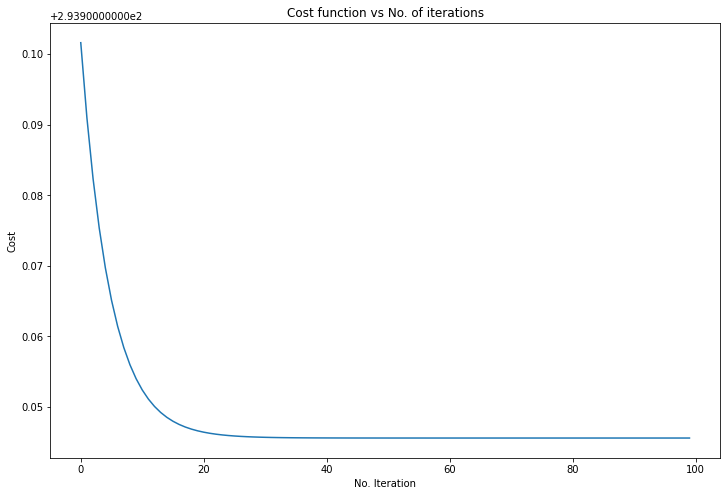

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(len(model.cost)), model.cost)
plt.xlabel("No. Iteration")
plt.ylabel("Cost")
plt.title("Cost function vs No. of iterations")
plt.show()

In [24]:
# test
y_predicted=model.test(x_norm) # normalized predicted y
print(y_predicted)

[[61.73106064]
 [60.52068246]
 [61.13763569]
 [59.32206842]
 [54.49231983]
 [59.93902165]
 [52.0833276 ]
 [59.3455967 ]
 [34.54460808]
 [55.1210372 ]
 [32.7290408 ]
 [52.09509174]
 [38.18750677]
 [58.7639359 ]
 [50.8964777 ]
 [59.97431408]
 [52.11862003]
 [61.19645641]
 [41.85393375]
 [52.14214831]
 [52.15391245]
 [58.20580337]
 [45.50859659]
 [54.58643296]
 [40.70237628]
 [55.83210358]
 [46.1490781 ]
 [52.20096902]
 [49.18678771]
 [59.47500227]
 [37.09477001]
 [60.6971446 ]
 [41.36638608]
 [62.5480043 ]
 [43.78714245]
 [60.73243702]
 [48.03523023]
 [55.29749934]
 [51.70165721]
 [61.38468268]
 [34.16293769]
 [58.97569046]
 [44.4629164 ]
 [54.75113096]
 [43.8577273 ]
 [58.9874546 ]
 [43.26430235]
 [57.18365147]
 [55.97327328]
 [54.7628951 ]
 [43.89301973]
 [53.5760452 ]
 [54.79818753]
 [37.85289295]
 [43.29959478]
 [45.11516206]
 [42.70616983]
 [31.81276618]
 [57.25423632]
 [41.51931993]
 [31.23110537]
 [62.09574906]
 [33.05843679]
 [40.92589498]
 [35.4909573 ]
 [62.72446644]
 [47.59473

In [25]:
# y=np.array(y).reshape(len(y),1)
ss_tot=sum((y-y.mean())**2)
ss_res=sum((y-y_predicted)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.10865084]


#### Decreasing alpha

In [26]:
# Train
model = MyLinearRegression()
model.train(x_norm, y, thetas, 0.001, 2000)
print('The coefficient: ',model.theta)

The coefficient:  [[50.19696851]
 [-8.48284717]
 [ 0.29689485]]


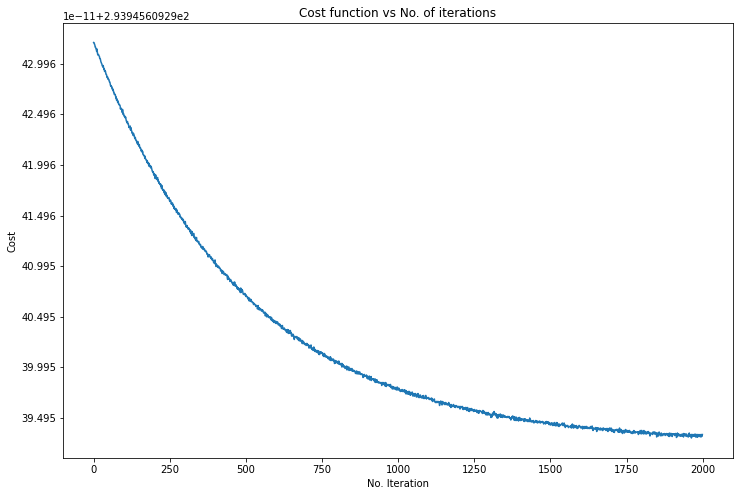

In [27]:
plt.figure(figsize=(12,8))
plt.plot(range(len(model.cost)), model.cost)
plt.xlabel("No. Iteration")
plt.ylabel("Cost")
plt.title("Cost function vs No. of iterations")
plt.show()

In [28]:
# test
y_predicted=model.test(x_norm) # normalized predicted y
print(y_predicted)

[[61.73106994]
 [60.52069156]
 [61.1376449 ]
 [59.32207733]
 [54.49232794]
 [59.93903067]
 [52.08333533]
 [59.34560562]
 [34.54461293]
 [55.12104543]
 [32.72904535]
 [52.09509948]
 [38.18751222]
 [58.76394473]
 [50.89648524]
 [59.97432311]
 [52.11862777]
 [61.19646564]
 [41.85393981]
 [52.14215607]
 [52.15392022]
 [58.20581213]
 [45.50860326]
 [54.58644113]
 [40.70238217]
 [55.83211196]
 [46.14908489]
 [52.20097681]
 [49.186795  ]
 [59.47501125]
 [37.09477532]
 [60.69715378]
 [41.3663921 ]
 [62.5480138 ]
 [43.78714887]
 [60.73244623]
 [48.03523736]
 [55.29750765]
 [51.70166495]
 [61.38469201]
 [34.16294255]
 [58.97569939]
 [44.46292295]
 [54.7511392 ]
 [43.85773376]
 [58.98746354]
 [43.26430872]
 [57.18366012]
 [55.97328173]
 [54.76290335]
 [43.8930262 ]
 [53.57605326]
 [54.7981958 ]
 [37.85289844]
 [43.29960116]
 [45.11516873]
 [42.70617612]
 [31.81277067]
 [57.25424501]
 [41.51932603]
 [31.23110978]
 [62.09575854]
 [33.0584415 ]
 [40.92590099]
 [35.49096241]
 [62.72447602]
 [47.59474

In [29]:
# y=np.array(y).reshape(len(y),1)
ss_tot=sum((y-y.mean())**2)
ss_res=sum((y-y_predicted)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.10865084]


## Implementing the deterministic normal equation

In [30]:
# add column of ones for interception factors
X=np.c_[np.ones(len(x)),x]
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [31]:
print('The coefficient: ',b)

The coefficient:  [[ 7.30532041e+01]
 [-6.05189207e-01]
 [ 1.17641491e-02]]


In [32]:
# y=np.array(y).reshape(len(y),1)
ss_tot=sum((y-y.mean())**2)
ss_res=sum((y-np.array(X.dot(b)))**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.10865084]


# implementation of sklearn solution

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Train the model
model.fit(x, y)
# predict target values 
y_pred = model.predict(x)

In [34]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [73.0532041]
Coefficients: [[-0.60518921  0.01176415]]


In [35]:
print("Score:", model.score(x,y))

Score: 0.10865084372803502


## Using all three methods to predict spending score for a customer with age 35 and annual income 44

### 1) using the implemented multivariate GD

In [36]:
# Train
model = MyLinearRegression()
model.train(x_norm, y, thetas, 0.1, 100)
print('The coefficient: ',model.theta)

The coefficient:  [[50.1969697 ]
 [-8.48284739]
 [ 0.29689488]]


In [37]:
normalized_age=(35-x['Age'].mean())/x['Age'].std()
normalized_income=(44-x['Annual Income (k$)'].mean())/x['Annual Income (k$)'].std()

In [38]:
print("The predicted spending score for that customer : ",(model.theta[0]+model.theta[1]*normalized_age+model.theta[2]*normalized_income))

The predicted spending score for that customer :  [52.38920441]


### 2) using the deterministic normal equation

In [39]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('The coefficient: ',b)

The coefficient:  [[ 7.30532041e+01]
 [-6.05189207e-01]
 [ 1.17641491e-02]]


In [40]:
print("The predicted spending score for that customer : ",(b[0]+b[1]*35+b[2]*44))

The predicted spending score for that customer :  [52.38920441]


### 3) using the sklearn library

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Train the model
model.fit(x, y)

LinearRegression()

In [42]:
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_[0])

Intercept: 73.05320409643335
Coefficients: [-0.60518921  0.01176415]


In [43]:
print("The predicted spending score for that customer : ",(model.intercept_[0]+model.coef_[0,0]*35+model.coef_[0,1]*44))

The predicted spending score for that customer :  52.389204408916555
